# Learning the topology of a Bayesian Network: the K2 algorithm
***

$$\text{Pr}\{S, \text{Data}\} = \text{Pr}\{S\}\int_{S'} \text{Pr}\{\text{Data}|S,S'\} f(S,S')dS'$$
$$\text{If Pr}\{\text{Data}|S,S'\} = \prod_{k=1}^{m}\text{Pr}\{\text{Case}_k|S,S'\}\Rightarrow\text{ Independent measurements.}$$
$$\text{And if } f(S,S') \text{ is uniform and }\text{Pr}\{S\}\text{ is equal }\forall S \Rightarrow \text{No prior knowledge.}$$

$$\Rightarrow \frac{\text{Pr}\{S| \text{Data}\}}{\text{Pr}\{S'| \text{Data}\}}=\frac{\text{Pr}\{S, \text{Data}\}}{\text{Pr}\{S', \text{Data}\}} = \frac{\prod_i^m f(i, \pi_i, S)}{\prod_j^m f(j, \pi_j, S')}$$

$$\text{Where } f(i, \pi_i, S) = \prod_j^{|\phi_i|}\frac{(r_i-1)!}{(N_{ij}+r_i-1)!}\prod_k^{r_i}N_{ijk}!\text{ and }N_{ij}=\sum_k^{r_i}N_{ijk}$$
$$\text{such that }\phi_i\text{ depends on S}$$

Inputs to the Algorithm: <br>
1. dataset $D$ containing the cases.
2. upper bound $u$ of possible parents.
3. an ordering of the nodes which constrains the configurations.

In [618]:
source('K2.R')
source('plot_graph.R')
library(dplyr)
library(gtools)
library(igraph)
library(permutations)
library(extraDistr)
require('data.table')


###### Suggested Dataset 

   x1 x2 x3
1   1  0  0
2   1  1  1
3   0  0  1
4   1  1  1
5   0  0  0
6   0  1  1
7   1  1  1
8   0  0  0
9   1  1  1
10  0  0  0
Parents of node  1 :	  
Parents of node  2 :	  1
Parents of node  3 :	  2


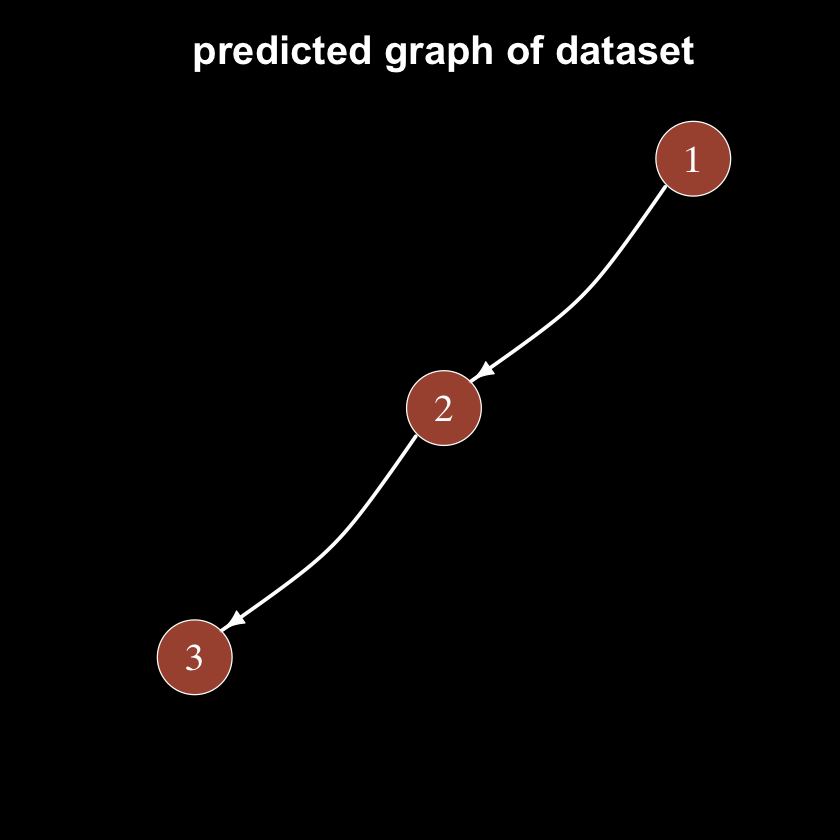

In [619]:
x1 <- c(1,1,0,1,0,0,1,0,1,0)
x2 <- c(0,1,0,1,0,1,1,0,1,0)
x3<- c(0,1,1,1,0,1,1,0,1,0)

D <- data.frame(x1, x2, x3)
print(D)
results <- k2(D, 2, print_result = TRUE)
plot_graph(results[[1]])

## randomly larger dataset with more possible parents

   x1 x2 x3 x4 x5 x6 x7 x8 x9 x10
1   1  0  0  1  1  1  1  1  1   1
2   1  1  0  0  1  0  0  0  0   1
3   0  0  1  1  1  0  1  1  0   1
4   1  1  0  0  0  0  1  0  1   1
5   0  0  0  1  1  0  1  1  1   1
6   0  1  0  0  0  0  1  1  1   0
7   1  1  0  0  1  1  0  1  1   0
8   0  0  0  0  0  0  0  1  1   0
9   1  1  0  0  1  0  1  1  0   0
10  0  0  0  1  1  1  0  1  1   1
Parents of node  1 :	  
Parents of node  2 :	  1
Parents of node  3 :	  
Parents of node  4 :	  2
Parents of node  5 :	  4, 1
Parents of node  6 :	  5
Parents of node  7 :	  6
Parents of node  8 :	  1
Parents of node  9 :	  3, 2, 5, 6
Parents of node  10 :	  4, 8


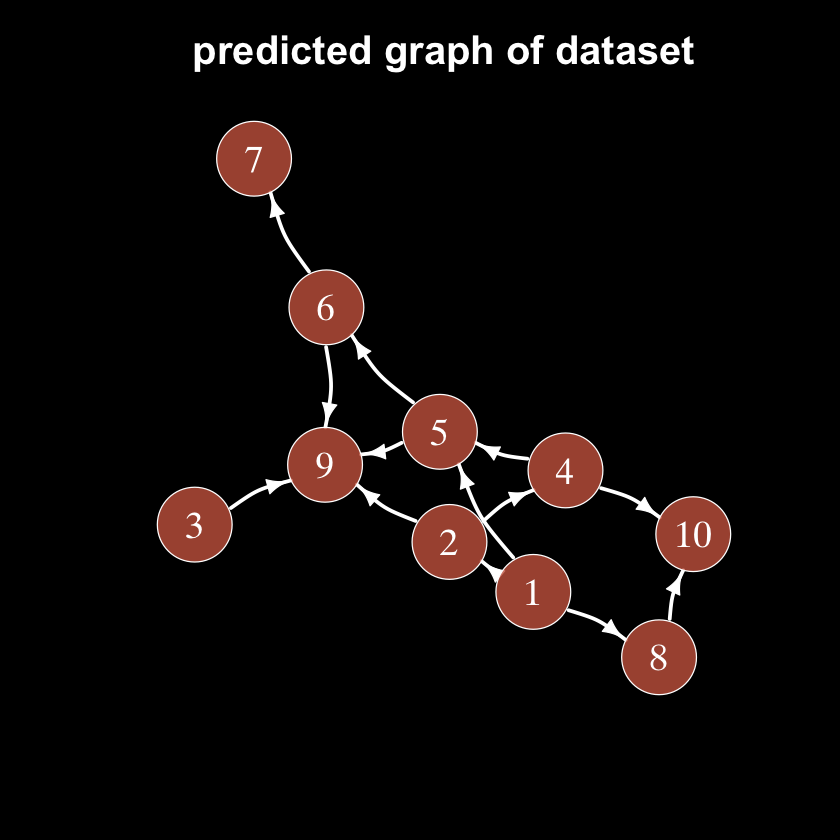

In [620]:
#create dataframe
x1 <- c(1,1,0,1,0,0,1,0,1,0)
x2 <- c(0,1,0,1,0,1,1,0,1,0)
x3<- c(0,0,1,0,0,0,0,0,0,0)
x4<- c(1,0,1,0,1,0,0,0,0,1)
x5<- c(1,1,1,0,1,0,1,0,1,1)
x6<- c(1,0,0,0,0,0,1,0,0,1)
x7<- c(1,0,1,1,1,1,0,0,1,0)
x8<- c(1,0,1,0,1,1,1,1,1,1)
x9<- c(1,0,0,1,1,1,1,1,0,1)
x10<- c(1,1,1,1,1,0,0,0,0,1)
D <- data.frame(x1, x2, x3, x4, x5, x6, x7, x8, x9, x10)
print(D)
results <- k2(D, 10, print_result = TRUE)
plot_graph(results[[1]])

## Dataset with floats and bigger ints

     x1   x2   x3   x4   x5  x6   x7
1   0.1  0.0  0.0 11.0  1.0 1.0  1.0
2  20.0  1.0  0.7  0.3 13.0 0.4  0.4
3   0.0  0.3 15.0 28.0 21.0 0.6  1.4
4   1.0 19.0  1.0  0.8  0.0 0.7  1.0
5   0.3  0.9  0.0  0.3 11.0 0.0  1.0
6   0.9  1.0  0.8  0.0  0.2 0.9 12.0
7   1.0  1.0 12.0 12.0 11.0 1.0  0.4
8   0.3  0.5  0.4  0.0 10.0 0.0 10.0
9  31.0  1.0  1.0  0.9 12.0 0.5  1.0
10  0.0  0.5  0.1  1.0 13.0 1.0 21.0
Parents of node  1 :	  
Parents of node  2 :	  1
Parents of node  3 :	  1
Parents of node  4 :	  3
Parents of node  5 :	  3
Parents of node  6 :	  1
Parents of node  7 :	  3


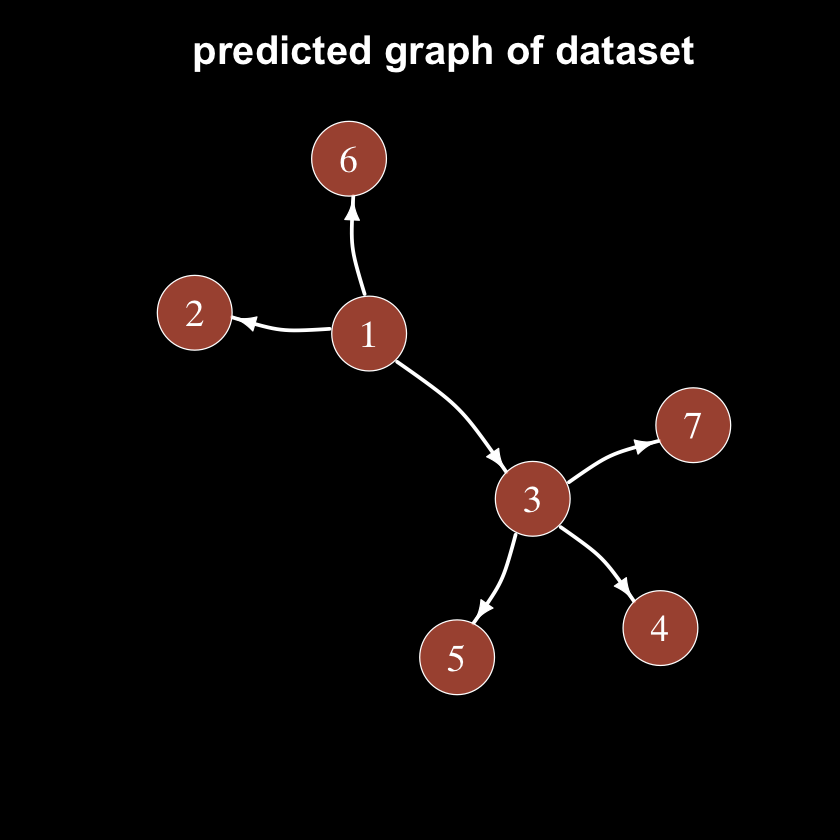

In [625]:
x1 <- c(0.1,20,0,1,0.3,0.9,1,0.3,31,0)
x2 <- c(0,1,0.3,19,0.9,1,1,0.5,1,0.5)
x3<- c(0,0.7,15,1,0,0.8,12,0.4,1,0.1)
x4<- c(11,0.3,28,0.8,0.3,0,12,0,0.9,1)
x5<- c(1,13,21,0,11,0.2,11,10,12,13)
x6<- c(1,0.4,0.6,0.7,0,0.9,1,0,0.5,1)
x7<- c(1,0.4,1.4,1,1,12,0.4,10,1,21)
D <- data.frame(x1, x2, x3, x4, x5, x6, x7)
print(D)
results <- k2(D, 1, print_result = TRUE)
plot_graph(results[[1]])

## Relative probabilities of network structures

We test all possible orderings of the network, _i.e._, we do not impose any a priori knowledge on the parent nodes, to check that we obtain the highest relative probability for the configuration that actually generated the data.

In the first case, Cooper and Herskovits specify that they used the configuration $X_1\rightarrow X_2 \rightarrow X_3$ to create the dataset.

We find indeed that structure to be the most probable:

[1] Best relative probability: 6.1728395e-06


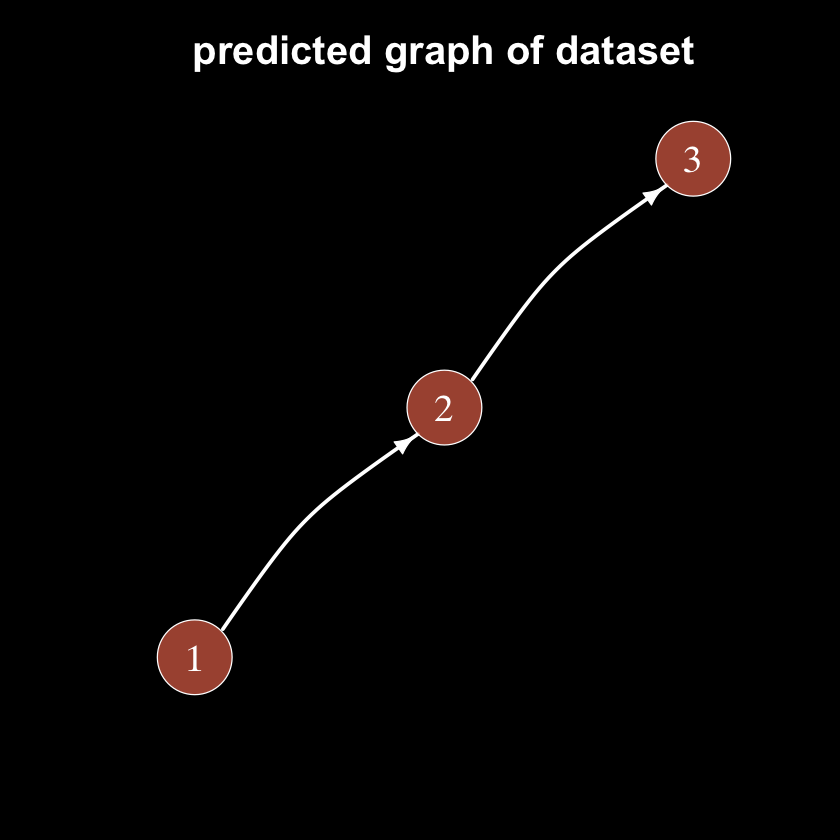

In [626]:
# k2 must return also the relative probability
x1 <- c(1,1,0,1,0,0,1,0,1,0)
x2 <- c(0,1,0,1,0,1,1,0,1,0)
x3<- c(0,1,1,1,0,1,1,0,1,0)
D <- data.frame(x1, x2, x3)
orders <- permutations(3, 3, c(1,2,3))
best_prob <- 0.0
for (i in 1:nrow(orders)){
    result <- k2(D, 2, order = orders[i,])
    prob <- result[[2]]
    if (prob > best_prob){
        best_result <- result
        best_prob <- prob
    }
}
plot_graph(best_result[[1]])
print(noquote(sprintf("Best relative probability: %.7e", best_result[[2]])))

We generate a dataset now with a known joint probability distribution
via a Monte Carlo Markov Chain with Gibbs sampling, and proceed with
the same check as before:

Consider the JPDF: $X_1\rightarrow X_2 \leftarrow X_3 \leftarrow X_4$

In [627]:
#TODO: generate dataset with MCMC sampling of known JPDF

## Computing time of normal vs $\log$  implementations

In [505]:
source('k2_log.R')
#Global log(x!) look-up table, as sugested by Cooper and Herskovits
log_fact <<- log(factorial(c(0:170)))
# log(x!) for x > 170 is Inf in R => Use Stirling's from then on
n <- c(171:10100)
log_fact <<- c(log_fact, n * log(n) - n)

We test the best conditions to see a speed-up in the log implementation: as many values for $X_i$ as there are cases.

In [306]:
cases = 10
min_value = 0
max_value = 10
x1 <- rdunif(cases, min_value, max_value)
x2 <- rdunif(cases, min_value, max_value)
x3 <- rdunif(cases, min_value, max_value)
x4 <- rdunif(cases, min_value, max_value)
x5 <- rdunif(cases, min_value, max_value)
x6 <- rdunif(cases, min_value, max_value)
x7 <- rdunif(cases, min_value, max_value)
x8 <- rdunif(cases, min_value, max_value)
x9 <- rdunif(cases, min_value, max_value)
D4 <- data.frame(x1, x2, x3, x4, x5, x6, x7, x8, x9)
print(D4)

   x1 x2 x3 x4 x5 x6 x7 x8 x9
1   0  4  8  0  3  2  7 10  6
2   8 10  0  1  8  3  5  1  1
3   8  4  3  4  1  7  3 10  4
4   4  0  0  7  8  0  2  0 10
5   4  1 10  3  4  0  4  0  0
6   9  5  6  7  0  0  3  7  2
7   3  9 10  8  7  3  8  8  3
8   6  0 10  1  3  4  1  9  5
9   9  0 10  4  3  3  2  8  3
10  0  3  2  4  0  9  8  6  0


In [307]:
log_times <- c()
for (i in 1:50){
    start.time <- proc.time()
    results <- k2_log(D4, 1)
    end.time <- proc.time()
    time.taken <- end.time - start.time
    log_times <- c(log_times, time.taken[[3]])
}
cat(noquote(paste("Time taken for log implementation (s):",
                  mean(log_times), "±", var(log_times), "\n")))

Time taken for log implementation (s): 1.48454000000002 ± 0.00973213102040586 


In [308]:
normal_times <- c()
for (i in 1:50){
    start.time <- proc.time()
    results <- k2(D4, 1)
    end.time <- proc.time()
    time.taken <- end.time - start.time
    normal_times <- c(normal_times, time.taken[[3]])
}
cat(noquote(paste("Time taken for normal implementation (s):",
                  mean(normal_times), "±", var(normal_times), "\n")))

Time taken for normal implementation (s): 1.71050000000003 ± 0.0134676428571568 


We see a small speed-up of a few seconds $\Rightarrow$ There must be more costly operations in our implementation than $\prod_k N_{ijk}$ or $\prod_j(r_i - 1) / (N_{ij} + r - 1)$

## Our results VS ``bnstruct`` results

In [562]:
library('bnstruct')
source('K2_log.R')
source('K2_bnstruct.R')

### Computing time

In [563]:
dataset <- asia()
D <- as.data.frame(raw.data(dataset))

In [615]:
orders <- rbind(c(1:8), c(1,2,3,4,5,6,8,7),
               c(1,2,3,4,5,8,7,6), c(1,4,7,5,3,2,8,6))
best_result <- NULL
best_prob <- -Inf
start.time <- proc.time()
for (i in 1:nrow(orders)){
    result <- k2_log(D, 2, order = orders[i,])
    prob <- result[[2]]
    if (prob > best_prob){
        best_result <- result
        best_prob <- prob
    }
}
end.time <- proc.time()
time.taken <- end.time - start.time
cat(noquote(paste("Time taken for our implementation (s):\n")))
time.taken

Time taken for our implementation (s):


   user  system elapsed 
  3.031   0.348   3.403 

In [616]:
start.time <- proc.time()
theirs <- k2_bnstruct(dataset, 8)
end.time <- proc.time()
time.taken <- end.time - start.time
cat(noquote(paste("Time taken for bnstruct (s):\n")))
time.taken

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.



Time taken for bnstruct (s):


   user  system elapsed 
  0.076   0.019   0.101 

### Resulting Graphs

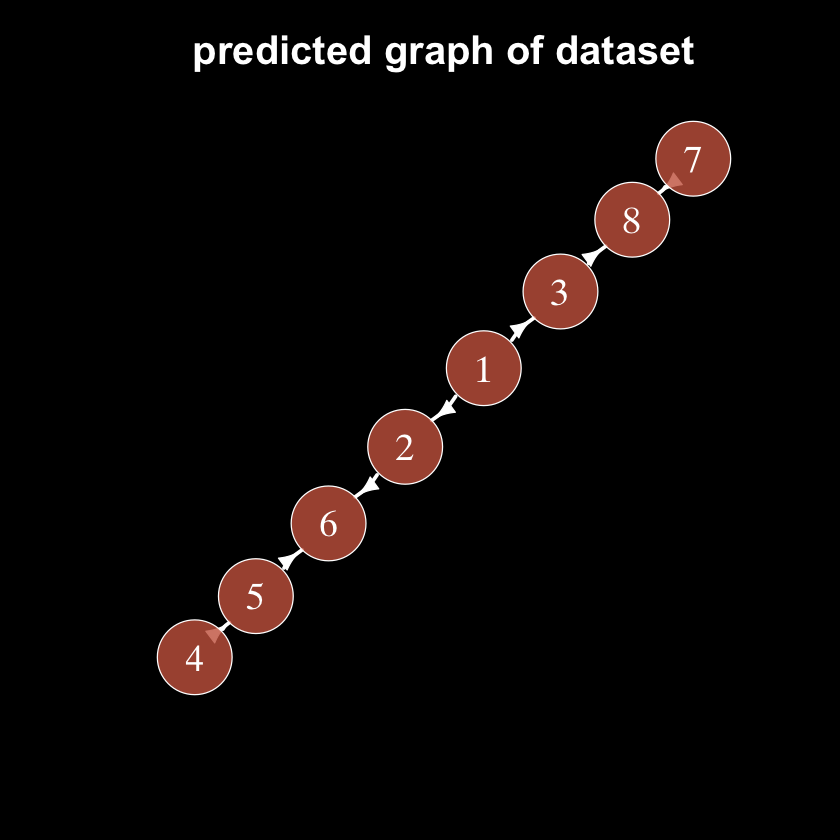

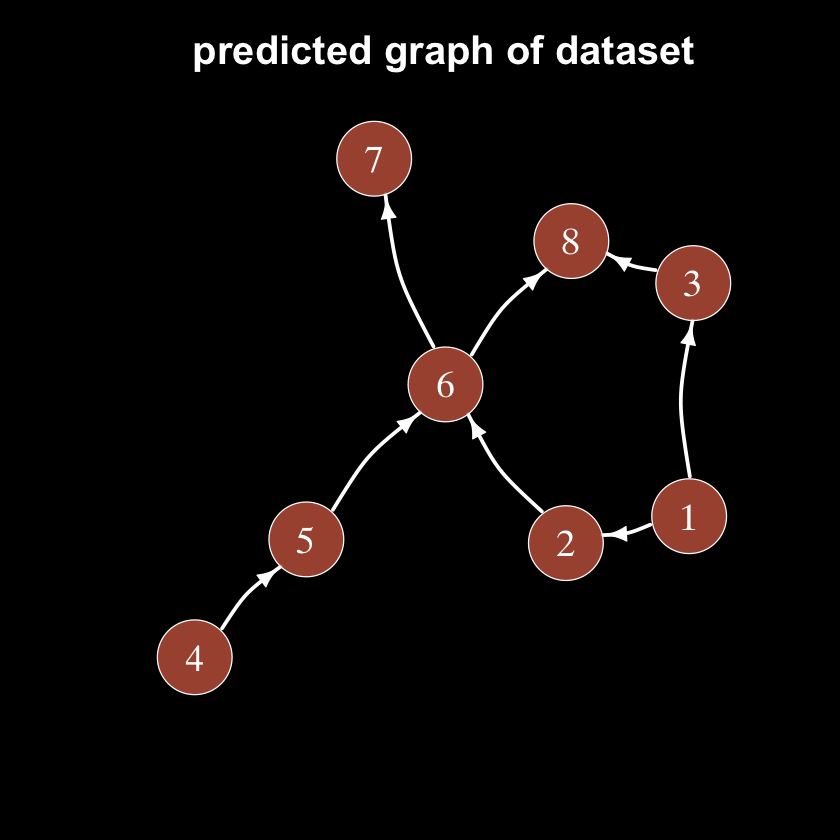

In [617]:
their_parents <- dag(theirs)
for (i in 1:ncol(their_parents)){
    for (j in 1:nrow(their_parents)){
        if (their_parents[i,j] != 0)
            their_parents[i,j] <- i 
    }
}
bnstruct_parents <- rep(list(0), ncol(their_parents))
for (i in 1:ncol(their_parents)){
    bnstruct_parents[[i]] <- their_parents[,i]
    bnstruct_parents[i] <- lapply(bnstruct_parents[i], function(x) {x[x!=0]})
}
plot_graph(bnstruct_parents)
plot_graph(best_result[[1]])